In [1]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pylab as plot
import missingno as msno 

# Setting a random state for reproducibility 
rndm_state = 42

### Part 1 - EDA and dataset exploration

In [2]:
#Importing and exploring the train data, Survived column is the target variable and the rest are features
train_data = pd.read_csv('Data/train.csv')
test_data = pd.read_csv('Data/test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.shape

(891, 12)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


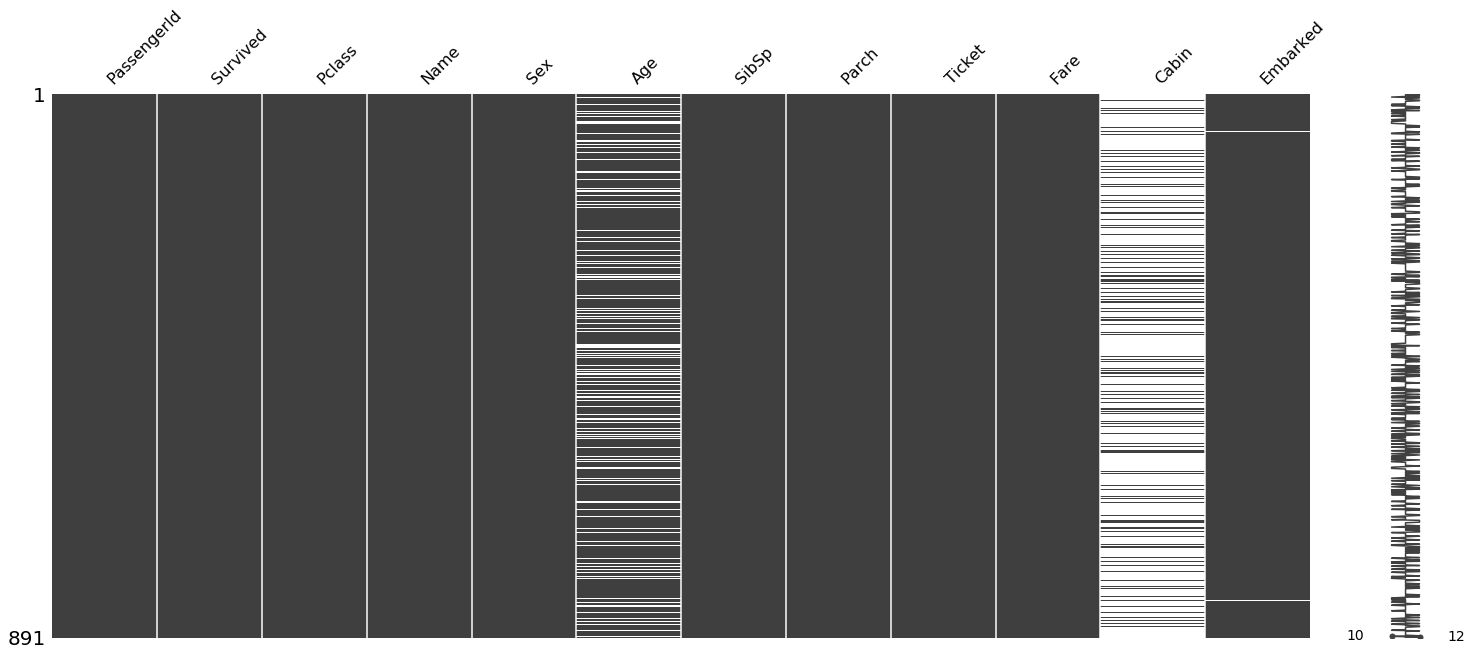

In [5]:
# Observing the distribution of missing values represented by white lines in the matrix below
msno.matrix(train_data) 

In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
frac_survived = train_data['Survived'].sum() / len(train_data['Survived'])

In [8]:
train_data.describe()['Survived']['mean'] == frac_survived

True

In [9]:
train_data['Died'] = 1 - train_data['Survived']

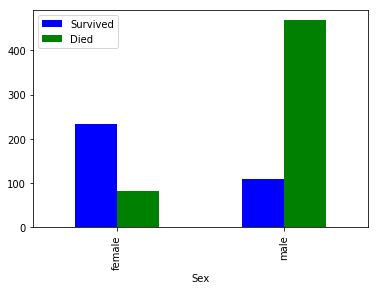

In [10]:
#Visualising the data
train_data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar',
                                                           color=['b', 'g'])

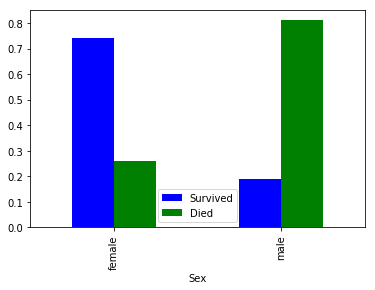

In [11]:
# We repeat the same visualisation as above but with fraction instead this time
train_data.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar',
                                                           color=['b', 'g'])

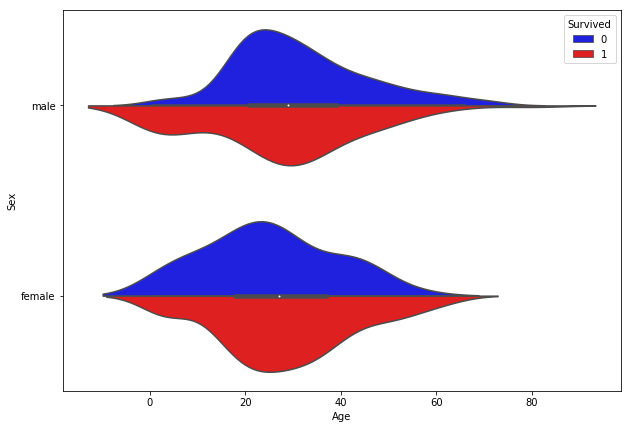

In [12]:
#Violin plots are a combination of a boxplot and a KDE
fig = plt.figure(figsize=(10, 7))
sns.violinplot(x='Age', y='Sex', 
               hue='Survived', data=train_data, 
               split=True,
               palette={0: "b", 1: "r"}
              )

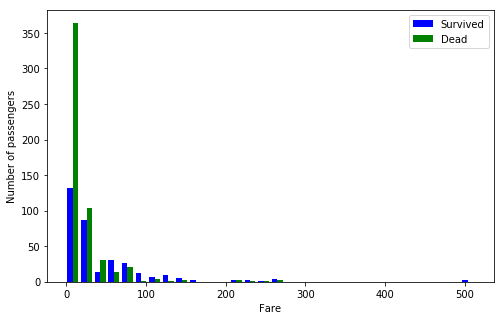

In [13]:
figure = plt.figure(figsize=(8,5))
plt.hist([train_data[train_data['Survived'] == 1]['Fare'], 
          train_data[train_data['Survived'] == 0]['Fare']],
         color = ['b','g'],
         bins = 30, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

In [14]:
train_data.groupby('Pclass').sum()[['Survived','Died']]

,Survived,Died
Pclass,,
1,136,80
2,87,97
3,119,372


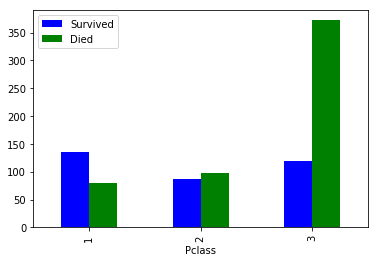

In [15]:
train_data.groupby('Pclass').sum()[['Survived','Died']].plot(kind='bar', color = ['b','g','r'])

In [16]:
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0


In [17]:
pclass_females_dfs = [train_data[(train_data['Pclass'] == i) 
                                 & (train_data['Sex'] == "female")].reset_index() for i in range(1,4)]

In [18]:
for df in pclass_females_dfs:
    frac_survived = round((df['Survived'].sum() / len(df['Survived'])) * 100 , 2)
    print("{}% of females from Passenger class {} survived".format(frac_survived , df['Pclass'][0]))

96.81% of females from Passenger class 1 survived
92.11% of females from Passenger class 2 survived
50.0% of females from Passenger class 3 survived


<strong>Creating a heatmat using the correlations between the features</strong>

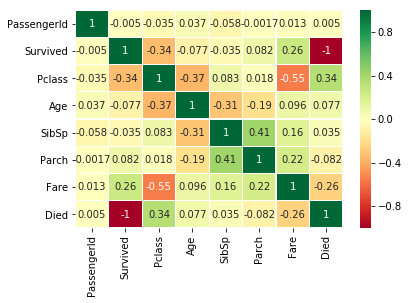

In [19]:
sns.heatmap(train_data.corr(), linecolor='white', annot=True , cmap='RdYlGn', linewidths=0.2)

## Part 2 - Feature Engineering 

In the previous part, we explored the data and spotted some interesting correlations.

In this part, we'll see how to process and transform these variables in such a way the data becomes manageable by a machine learning algorithm.

We'll also create, or "engineer" additional features that will be useful in building the model.

We'll see along the way how to process text variables like the passenger names and integrate this information in our model.

We will break our code in separate functions for more clarity.

But first, let's define a print function that asserts whether or not a feature has been processed.

In [20]:
def status(feature):
    print('Processing', feature) 

Loading the data

In [21]:
def get_combined_data():
    # reading train data
    train = pd.read_csv('Data/train.csv')
    
    # reading test data
    test = pd.read_csv('Data/test.csv')

    # extracting and then removing the targets from the training data 
    targets = train.Survived
    train.drop(['Survived'], axis='columns', inplace=True)
    

    # merging train data and test data for future feature engineering
    # we'll also remove the PassengerID since this is not an informative feature
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'PassengerId'], inplace=True, axis=1)
    
    return combined

In [22]:
combined = get_combined_data()

In [23]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
# Length of combined dataframe matches the sum of test and train dataframes
combined.shape[0] == train_data.shape[0] + test_data.shape[0] 

True

In [25]:
# We create a set containing the titles of the passengers
titles = set()
for name in train_data['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip()) 

In [26]:
print(titles)

{'Mrs', 'Miss', 'Don', 'Master', 'Ms', 'Rev', 'Lady', 'Capt', 'the Countess', 'Jonkheer', 'Col', 'Sir', 'Major', 'Dr', 'Mme', 'Mlle', 'Mr'}


In [27]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}
def get_titles():
    # we extract the title from each name
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title
    # we map each title
    combined['Title'] = combined.Title.map(Title_Dictionary)
    status('Title')
    return combined

In [28]:
combined = get_titles()

Processing Title


In [29]:
combined[combined['Title'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,NaN


In [30]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


<strong>Processing 'Ages'</strong>

In [31]:
#Number of missing ages in the train set
print(combined.iloc[:891].Age.isnull().sum())

177


In [32]:
grouped_train = combined.iloc[:891].groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

In [33]:
grouped_median_train.head()

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0


This dataframe will help us impute missing age values based on different criteria.

Look at the median age column and see how this value can be different based on the Sex, Pclass and Title put together.

For example:

If the passenger is female, from Pclass 1, and from royalty the median age is 40.5.
If the passenger is male, from Pclass 3, with a Mr title, the median age is 26.

Let's create a function that fills in the missing age in combined based on these different attributes.

In [34]:
#This function returns the median age value for a row with Sex,Title and Pclass values that match the values from group_median_train DataFrame
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_train[condition]['Age'].values[0]


def process_age():
    global combined
    # a function that fills the missing values of the Age variable
    combined['Age'] = combined.apply(lambda row: fill_age(row) if np.isnan(row['Age']) 
                                     else row['Age'], axis=1)
    status('age')
    return combined

In [35]:
combined = process_age()

Processing age


In [36]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [37]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1309 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Title       1308 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 112.6+ KB


<strong>Processing 'Names'</strong>

We now proceed to process the names, by removing them and also to encode title values using dummy encoding

In [38]:
def process_names():
    global combined
    # we clean the Name variable
    combined.drop('Name', axis=1, inplace=True)
    
    # encoding in dummy variable
    titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')
    combined = pd.concat([combined, titles_dummies], axis=1)
    
    # removing the title variable
    combined.drop('Title', axis=1, inplace=True)
    
    status('names')
    return combined

In [39]:
combined = process_names()

Processing names


In [40]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


<strong>Processing 'Fare'</strong>

Let's impute the missing fare value by the average fare computed on the train set

In [41]:
def process_fares():
    global combined
    # there's one missing fare value - replacing it with the mean.
    combined.Fare.fillna(combined.iloc[:891].Fare.mean(), inplace=True)
    status('fare')
    return combined

In [42]:
combined = process_fares()

Processing fare


<strong>Processing 'Embarked'</strong>

Processing embarked by filling them with the most occuring value, ie. Southampton and encoding them

In [43]:
def process_embarked():
    global combined 
    # Fill Nulls with an 'S' value
    combined['Embarked'].fillna('S' , inplace=True)
    #Introduce dummy variables
    embarked_dummies = pd.get_dummies(combined['Embarked'] , prefix = 'Embarked')
    # Merging the two dataframes horizontally and droping the 'Embarked' column from the resulting DF
    combined = pd.concat([combined, embarked_dummies], axis=1)
    combined.drop('Embarked', axis=1, inplace=True)
    status('Embarked')
    return combined

In [44]:
combined = process_embarked()

Processing Embarked


In [45]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,C123,0,0,0,1,0,0,0,0,1
4,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,0,0,0,1


<strong>Processing 'Cabin'</strong>

In [46]:
train_cabin, test_cabin = set(), set()

for cabin in combined.iloc[:891]['Cabin']:
    if type(cabin) == float :
        train_cabin.add('U')
    else:
        train_cabin.add(cabin[0])
        
for cabin in combined.iloc[891:]['Cabin']:
    if type(cabin) == float :
        test_cabin.add('U')
    else:
        test_cabin.add(cabin[0])

In [47]:
display(train_cabin,test_cabin)

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'U'}

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'U'}

This function replaces NaN values with U (for Unknow). It then maps each Cabin value to the first letter. Then it encodes the cabin values using dummy encoding.

In [48]:
def process_cabin():
    global combined    
    # replacing missing cabins with U (for Uknown)
    combined.Cabin.fillna('U', inplace=True)
    
    # mapping each Cabin value with the cabin letter
    combined['Cabin'] = combined['Cabin'].map(lambda c: c[0])
    
    # dummy encoding ...
    cabin_dummies = pd.get_dummies(combined['Cabin'], prefix='Cabin')    
    combined = pd.concat([combined, cabin_dummies], axis=1)

    combined.drop('Cabin', axis=1, inplace=True)
    status('cabin')
    return combined

In [49]:
combined = process_cabin()

Processing cabin


In [50]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,3,male,35.0,0,0,373450,8.0500,0,0,1,...,1,0,0,0,0,0,0,0,0,1


<strong>Processing 'Sex'</strong>

In [51]:
def process_sex():
    global combined
    combined['Sex'] = combined['Sex'].map({'male':1,'female':0})
    status('Sex')
    return combined

In [52]:
combined = process_sex()

Processing Sex


<strong>Processing 'Pclass'</strong>

In [53]:
def process_pclass():
    
    global combined
    # encoding into 3 categories:
    pclass_dummies = pd.get_dummies(combined['Pclass'], prefix="Pclass")
    
    # adding dummy variable
    combined = pd.concat([combined, pclass_dummies],axis=1)
    
    # removing "Pclass"
    combined.drop('Pclass',axis=1,inplace=True)
    
    status('Pclass')
    return combined

In [54]:
combined = process_pclass()

Processing Pclass


In [55]:
combined.head()

,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3
0,1,22.0,1,0,A/5 21171,7.2500,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0,38.0,1,0,PC 17599,71.2833,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,35.0,1,0,113803,53.1000,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,1,35.0,0,0,373450,8.0500,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


<strong>Processing 'Family'</strong>

This part includes creating new variables based on the size of the family (the size is by the way, another variable we create).

This creation of new variables is done under a realistic assumption: Large families are grouped together, hence they are more likely to get rescued than people traveling alone.

This function introduces 4 new features:

* FamilySize : the total number of relatives including the passenger (him/her)self.
* Sigleton : a boolean variable that describes families of size = 1
* SmallFamily : a boolean variable that describes families of 2 <= size <= 4
* LargeFamily : a boolean variable that describes families of 5 < size

In [56]:
def process_family():
    
    global combined
    # introducing a new feature : the size of families (including the passenger)
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    # introducing other features based on the family size
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    
    status('family')
    return combined

In [57]:
combined = process_family()

Processing family


In [58]:
combined.head()

,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,22.0,1,0,A/5 21171,7.2500,0,0,1,0,...,0,0,1,0,0,1,2,0,1,0
1,0,38.0,1,0,PC 17599,71.2833,0,0,0,1,...,0,0,0,1,0,0,2,0,1,0
2,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,...,0,0,1,0,0,1,1,1,0,0
3,0,35.0,1,0,113803,53.1000,0,0,0,1,...,0,0,0,1,0,0,2,0,1,0
4,1,35.0,0,0,373450,8.0500,0,0,1,0,...,0,0,1,0,0,1,1,1,0,0


<strong>Processing 'Ticket'</strong>

In [59]:
def get_ticket_prefix(ticket):
# Creating a list of strings with 2 elements,the ticket prefix (if it extists) and the ticket number
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split(" ")
    if len(ticket) > 1:
        return ticket[0]
    else:
        return 'No prfx'

In [60]:
tickets = set()
for ticket in combined['Ticket']:
    tickets.add(get_ticket_prefix(ticket))

In [61]:
tickets

{'A',
 'A4',
 'A5',
 'AQ3',
 'AQ4',
 'AS',
 'C',
 'CA',
 'CASOTON',
 'FC',
 'FCC',
 'Fa',
 'LP',
 'No prfx',
 'PC',
 'PP',
 'PPP',
 'SC',
 'SCA3',
 'SCA4',
 'SCAH',
 'SCOW',
 'SCPARIS',
 'SCParis',
 'SOC',
 'SOP',
 'SOPP',
 'SOTONO2',
 'SOTONOQ',
 'SP',
 'STONO',
 'STONO2',
 'STONOQ',
 'SWPP',
 'WC',
 'WEP'}

In [62]:
def process_ticket():
    
    global combined
    
    combined['Ticket'] = combined['Ticket'].map(get_ticket_prefix)
    ticket_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
    combined = pd.concat([combined, ticket_dummies], axis=1)
    combined.drop('Ticket', inplace=True, axis=1)

    status('Ticket')
    return combined

In [63]:
combined = process_ticket()

Processing Ticket


# Part 3 - Modelling 

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold, PredefinedSplit
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.model_selection import cross_val_score , train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve , roc_auc_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import lightgbm as lgb
from lightgbm import LGBMClassifier

<p>We define some functions for computing a score function using the <strong>metric accuracy</strong>.</p> <p> We also introduce a function for splitting the 'Combined' DataFrame into the Train, Test and Target DataFrames</p>

In [65]:
def train_test_target():
    global combined
    # Extracting the 'Survived' column (target variable) from the train csv
    targets = pd.read_csv('Data/train.csv', usecols=['Survived'])['Survived'].values
    # Introducing training and test sets from the combined DataFrame
    train = combined.iloc[:891]
    test = combined.iloc[891:]
    
    return train, test, targets

In [66]:
train, test, targets = train_test_target()

In [67]:
X_train , X_test , y_train , y_test = train_test_split(train , targets , 
                                                       test_size = 0.32 , random_state = rndm_state)

In [68]:
# Create a list where train data indices are -1 and validation data indices are 0
split_index = [-1 if x in X_train.index else 0 for x in train.index]

# Use the list to create PredefinedSplit where we only evaluate on the test set
ps = PredefinedSplit(test_fold = split_index)

In [69]:
def compute_val_score(classifier, X , y):
    val_score = cross_val_score(classifier, X, y, cv = ps, scoring = 'accuracy')
    return val_score[0]

In [70]:
def get_train_score(model):
    
    return model.score(X_train_reduced , y_train)

In [71]:
def get_test_score(model):
    
    return model.score(X_test_reduced , y_test)

### Feature selection

In [72]:
classifier = RandomForestClassifier(n_estimators=50, max_features='log2')
classifier = classifier.fit(train, targets)

In [73]:
# Creating a dataframe with each feature and its importance in increasing order
features = pd.DataFrame()
features['Feature'] = train.columns
features['Importance'] = classifier.feature_importances_
features.sort_values(by='Importance', ascending=False, inplace=True)
features.set_index('Feature', inplace=True)

In [74]:
features.head()

,Importance
Feature,
Age,0.188748
Fare,0.173742
Sex,0.107140
Title_Mr,0.099592
Title_Miss,0.045045


Text(0, 0.5, 'Feature Importance')

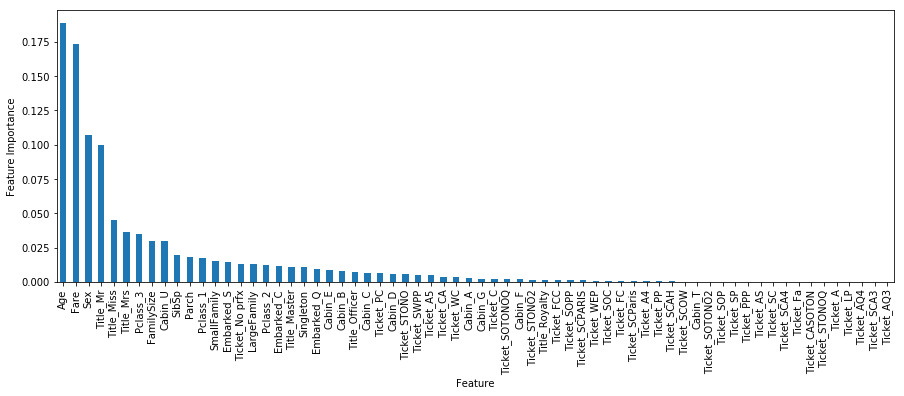

In [75]:
features.plot(kind = 'bar', figsize = (15,5) , legend = False)
plt.ylabel('Feature Importance')

In [76]:
# Reducing the number of features in the train data
model = SelectFromModel(classifier, prefit=True)
train_reduced = model.transform(train)
# 53 features have been removed in the process
display(train_reduced.shape,train.shape)

(891, 13)

(891, 66)

In [77]:
test_reduced = model.transform(test)
print(test_reduced.shape)

(418, 13)


In [78]:
X_train_reduced = model.transform(X_train)
X_test_reduced = model.transform(X_test)

#### Trying different Base Models

In [79]:
logreg = LogisticRegression()

RF = RandomForestClassifier(n_estimators=100,
                           min_samples_split=2,
                           min_samples_leaf=2,
                           max_depth=10,
                           max_features='log2',
                           bootstrap=True,
                           oob_score=True,
                           random_state=rndm_state)

GBoost = GradientBoostingClassifier()

lightgbm = LGBMClassifier(num_leaves=30,
                       learning_rate=0.01, 
                       n_estimators=500,
                       max_bin=10,
                       max_depth=10,
                       min_data_in_leaf=50,
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.21,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=rndm_state ,n_jobs=-1)


models = [logreg, RF, GBoost,lightgbm]

In [80]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action = 'ignore', category = ConvergenceWarning)

In [81]:
for model in models:
    print('Cross-validation of : {}'.format(model.__class__))
    score = compute_val_score(classifier = model , X = train_reduced, y = targets)
    print('CV score = {}'.format(score))
    print('*************************************************************************')

Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegression'>
CV score = 0.8216783216783217
*************************************************************************
Cross-validation of : <class 'sklearn.ensemble.forest.RandomForestClassifier'>
CV score = 0.8286713286713286
*************************************************************************
Cross-validation of : <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
CV score = 0.8251748251748252
*************************************************************************
Cross-validation of : <class 'lightgbm.sklearn.LGBMClassifier'>
CV score = 0.8426573426573427
*************************************************************************


In [82]:
lightgbm.fit(X_train_reduced , y_train)

LGBMClassifier(bagging_fraction=0.8, bagging_freq=4, bagging_seed=8,
        boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        feature_fraction=0.21, feature_fraction_seed=8,
        importance_type='split', learning_rate=0.01, max_bin=10,
        max_depth=10, min_child_samples=20, min_child_weight=0.001,
        min_data_in_leaf=50, min_split_gain=0.0,
        min_sum_hessian_in_leaf=11, n_estimators=500, n_jobs=-1,
        num_leaves=30, objective=None, random_state=42, reg_alpha=0.0,
        reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0, verbose=-1)

In [83]:
RF.fit(X_train_reduced , y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [84]:
# Light GBM train and valid. set scores
display(get_train_score(lightgbm) , get_test_score(lightgbm))

0.8264462809917356

0.8426573426573427

In [85]:
y_valid_pred = lightgbm.predict(X_test_reduced)

In [86]:
y_valid_prob = lightgbm.predict_proba(X_test_reduced)
y_valid_prob = y_valid_prob[:,1]

In [87]:
lgbm_auc = roc_auc_score(y_test , y_valid_prob)

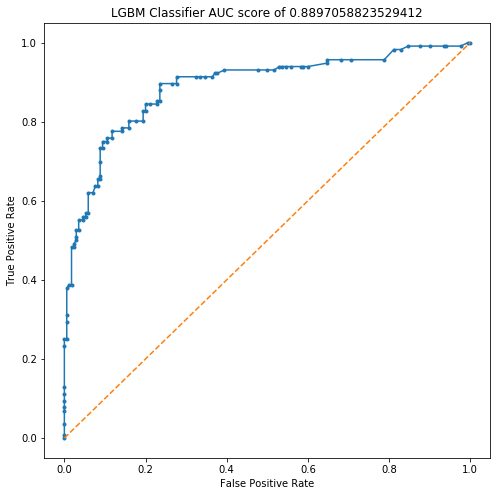

In [88]:
lgbm_fpr, lgbm_tpr, _ = roc_curve(y_test, y_valid_prob)

plt.figure(figsize=(8,8))
# plot the roc curve for the model
plt.plot(lgbm_fpr, lgbm_tpr, marker='.', label='LGBM')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1],'--')
plt.title(f'LGBM Classifier AUC score of {lgbm_auc}')
# show the plot
plt.show()

In [89]:
# RF and valid. set scores
display(get_train_score(RF) , get_test_score(RF))

0.8991735537190083

0.8286713286713286

In [90]:
y_valid_pred = RF.predict(X_test_reduced)

In [91]:
y_valid_prob = RF.predict_proba(X_test_reduced)
y_valid_prob = y_valid_prob[:,1]

In [92]:
RF_auc = roc_auc_score(y_test , y_valid_prob)

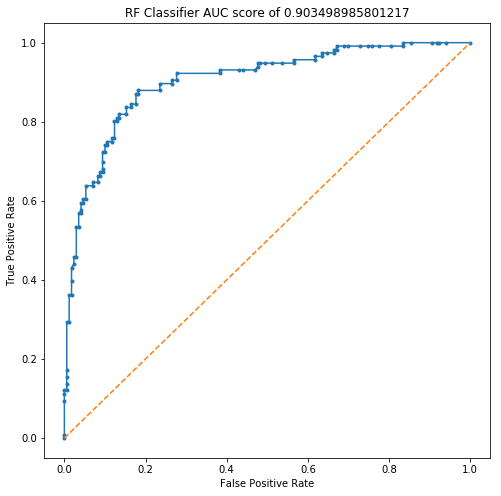

In [93]:
RF_fpr, RF_tpr, _ = roc_curve(y_test, y_valid_prob)

plt.figure(figsize=(8,8))
# plot the roc curve for the model
plt.plot(RF_fpr, RF_tpr, marker='.', label='RF')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1],'--')
plt.title(f'RF Classifier AUC score of {RF_auc}')
# show the plot
plt.show()

  ##### We perform hyperparameter tunning on the Random Forest and Light GBM classifiers firstly using RandomizedSearchCV on a bigger hyperparameter space and then using GridSearchCV on specific areas within our initial hyperparameter space. 
  

In [94]:
# Tuning the RF Classifier via RandomizedSearchCV

optimize = False

# Set optimize to True to tune the RF model
if optimize:
    

    from datetime import datetime 

    start_time = datetime.now()

    
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 10000, num = 30)]
    n_estimators.append(60)
    
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt','log2']
    
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    max_depth.append(8)
    
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 7,10,15,20,30,50,100,200,500]
    
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1,2, 4,5,8,10,12,15,20]
    
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    
    
    # Create the parameter grid
    rf_param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
                    }



    # Using the test set to perform the validation in RandomizedSearch

    rf_grid_search = RandomizedSearchCV( RandomForestClassifier(oob_score = True, bootstrap=True,
                                        random_state = rndm_state) , 
                                       param_distributions = rf_param_grid , n_iter = 100,
                                      scoring = 'accuracy' ,
                                      refit = True , cv = ps , random_state = rndm_state )

    rf_grid_search.fit(train , targets)

    time_elapsed = datetime.now() - start_time 

    print(f'Time elapsed (hh:mm:ss.ms) {time_elapsed}','\n')
    print('Optimal hyperparameters found using RandomizedGridSearch:','\n \n' , rf_grid_search.best_params_,'\n')

In [95]:
if optimize:
    
    # DataFrame of the parameters of the best 5 validation scores

    display(pd.DataFrame(rf_grid_search.cv_results_).sort_values('rank_test_score',ascending=True).head())

In [96]:
# Tuning the RF Classifier via GridSearchCV

optimize = False

# Set optimize to True to tune the RF model
if optimize:
    

    from datetime import datetime 

    start_time = datetime.now()

    
    # Number of trees in random forest
    n_estimators = [60,80,90,100]
    
    # Number of features to consider at every split
    max_features = ['auto', 'log2']
    
    # Maximum number of levels in tree
    max_depth = [10,20,30]
    
    # Minimum number of samples required to split a node
    min_samples_split = [2, 4, 8,20]
    
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [2,4,8,10]
    
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    
    
    # Create the parameter grid
    rf_param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
                    }



    # Using the test set to perform the validation in RandomizedSearch

    rf_grid_search = GridSearchCV( RandomForestClassifier(oob_score = True, bootstrap=True,
                                        random_state = rndm_state) , 
                                       param_grid = rf_param_grid ,
                                      scoring = 'accuracy' ,
                                      refit = True , cv = ps)

    rf_grid_search.fit(train , targets)

    time_elapsed = datetime.now() - start_time 

    print(f'Time elapsed (hh:mm:ss.ms) {time_elapsed}','\n')
    print('Optimal hyperparameters found using RandomizedGridSearch:','\n \n' , rf_grid_search.best_params_,'\n')

In [97]:
# Random Forest regressor with the optimal hyperparameters found above (and some trial and error!)

rf = RandomForestClassifier(n_estimators=120,
                           min_samples_split=2,
                           min_samples_leaf=2,
                           max_depth=10,
                           max_features='log2',
                           bootstrap=True,
                           oob_score=True,
                           random_state=rndm_state)

rf.fit(train_reduced , targets)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [98]:
# Tuning LGBM Classifier via RandomizedSearchCV

optimize = False

# Set optimize to True to tune the LGBM model
if optimize:
     

    start_time = datetime.now()

    
    lgbm_params_grid = {'num_leaves':[3,5,6,8,15,30,50],
                        
            'max_depth':[5,8,9,10,12,14,17,20,50,100],
                        
            'min_data_in_leaf':[5,7,10,12,14,17,20,50],
                        
            'learning_rate':[0.001,0.005,0.01,0.0125,0.013,0.015,0.1,0.125],
                        
            'n_estimators':[100,500,1000,4000,4500,5000,5500,6000,6500,7000,7500,8000],
                        
            'max_bin':[15,30,40,50,75,100,200,500]}



    # Using the test set to perform the validation in GridSearch

    lgbm_grid_search = RandomizedSearchCV( LGBMClassifier(objective='binary',boosting_type = 'dart',
                                             random_state = rndm_state ) , 
                               param_distributions = lgbm_params_grid , n_iter = 200,
                                      scoring = 'accuracy' ,
                              refit = True , cv = ps )
    
# Fitting on the whole train set since we use our predefined split to validate only on the test set

    lgbm_grid_search.fit(train , targets)

    time_elapsed = datetime.now() - start_time 

    print(f'Time elapsed (hh:mm:ss.ms) {time_elapsed}','\n')
    print('Optimal hyperparameters found using RandomizedGridSearch:','\n \n' , lgbm_grid_search.best_params_,'\n')

In [99]:
if optimize:
    
    # DataFrame of the parameters of the best 5 validation scores

    display(pd.DataFrame(lgbm_grid_search.cv_results_).sort_values('rank_test_score',ascending=True).head())

In [100]:
# The optimal hyperparameters found after tuning (and also with some trial and error!) 

lightgbm = LGBMClassifier(num_leaves=8,
                       learning_rate=0.0125, 
                       n_estimators=120,
                       max_bin=10,
                       max_depth=10,
                       min_data_in_leaf=50,
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.21,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=rndm_state ,n_jobs=-1)

In [101]:
lightgbm.fit( train_reduced , targets)

LGBMClassifier(bagging_fraction=0.8, bagging_freq=4, bagging_seed=8,
        boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        feature_fraction=0.21, feature_fraction_seed=8,
        importance_type='split', learning_rate=0.0125, max_bin=10,
        max_depth=10, min_child_samples=20, min_child_weight=0.001,
        min_data_in_leaf=50, min_split_gain=0.0,
        min_sum_hessian_in_leaf=11, n_estimators=120, n_jobs=-1,
        num_leaves=8, objective=None, random_state=42, reg_alpha=0.0,
        reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0, verbose=-1)

### Making the predictions and saving them to a CSV for submission

In [102]:
# Using our tuned model to make predictions using the 'Test' DataFrame and exporting the predictions
predictions = lightgbm.predict(test_reduced).astype(int) 
predictions_df = pd.DataFrame()
_ = pd.read_csv('Data/test.csv')
predictions_df['PassengerId'] = _['PassengerId']
predictions_df['Survived'] = predictions
submission_df = predictions_df[['PassengerId','Survived']]
submission_df.to_csv('submission.csv', index=False)